In [1]:
import pandas as pd
import os
import re
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import shutil

In [2]:
data = pd.read_csv("Data/2019/1678982456718_index_3852_inv01_today_energy_data.csv", delimiter=";")
data.head()

,Date,Timestamp,Value,Signal
0,2019-10-30 16:33:00,1572433380000,0,Inv01_Today_Energy
1,2019-10-30 16:34:00,1572433440000,0,Inv01_Today_Energy
2,2019-10-30 16:35:00,1572433500000,1750,Inv01_Today_Energy
3,2019-10-30 16:36:00,1572433560000,1751,Inv01_Today_Energy
4,2019-10-30 16:37:00,1572433620000,1752,Inv01_Today_Energy


In [3]:
data.shape

(28639, 4)

In [8]:
data.Date.nunique()

28639

In [16]:
file_names = os.listdir("Data/All Data/2021/")

In [17]:
id_variables = [re.match("\d+_index_\d+_([^_]+)_([^.]+)", file_name).groups() for file_name in file_names]

In [18]:
grouped_items = {}
for item in id_variables:
    if item[0] in grouped_items.keys():
        grouped_items[item[0]].append(item[1])
    else:
        grouped_items.update({item[0]:[item[1]]})
grouped_items

{'inv01': ['today_energy_data',
  'total_energy_data',
  'total_run_data',
  'temp_data',
  'dc1_volt_data',
  'dc1_amps_data',
  'dc_power_data',
  'r_volt_data',
  'y_volt_data',
  'b_volt_data',
  'r_amps_data',
  'y_amps_data',
  'b_amps_data',
  'act_power_data',
  'pf_data',
  'freq_data',
  'status_data',
  'fault_code_data',
  'today_run_data',
  'dc01_amps_data',
  'dc02_amps_data',
  'dc03_amps_data',
  'dc04_amps_data',
  'dc05_amps_data',
  'dc06_amps_data',
  'dc07_amps_data',
  'dc08_amps_data',
  'dc09_amps_data',
  'dc10_amps_data'],
 'inv02': ['today_energy_data',
  'total_energy_data',
  'total_run_data',
  'temp_data',
  'dc1_volt_data',
  'dc1_amps_data',
  'dc_power_data',
  'r_volt_data',
  'y_volt_data',
  'b_volt_data',
  'r_amps_data',
  'y_amps_data',
  'b_amps_data',
  'act_power_data',
  'pf_data',
  'freq_data',
  'status_data',
  'fault_code_data',
  'today_run_data',
  'dc01_amps_data',
  'dc02_amps_data',
  'dc03_amps_data',
  'dc04_amps_data',
  'dc05_a

In [19]:
a = ['today_energy_data', 'total_run_data', 'today_run_data', 'total_energy_data', 'temp_data', 'irradiance_data', 'temp_data']
', '.join(a)

'today_energy_data, total_run_data, today_run_data, total_energy_data, temp_data, irradiance_data, temp_data'

In [20]:
required_file_names = []

for i in a:
    for file_name in file_names:
        if i in file_name:
            required_file_names.append(file_name)

In [21]:
for name in required_file_names:
    shutil.copy(f"Data/All Data/2021/{name}", f"Data/Required Data Yearwise/2021 Required/{name}")

In [23]:
import pandas as pd
import os

# Specify the directory containing the Excel files
directory = "Data/Required Data Yearwise/2020 Required"
# Loop over each file in the directory
for filename in os.listdir(directory):
    filepath = os.path.join(directory, filename) # Get the full filepath

    # Read in the Excel file
    df = pd.read_csv(filepath, delimiter=";")

    df.to_csv(filepath, index=False)

In [24]:
import pandas as pd
import os

# Specify the directory containing the Excel files
directory = "Data/Required Data Yearwise/2021 Required"
# Loop over each file in the directory
for filename in os.listdir(directory):
    filepath = os.path.join(directory, filename) # Get the full filepath

    # Read in the Excel file
    df = pd.read_csv(filepath, delimiter=";")

    df.to_csv(filepath, index=False)

In [24]:
', '.join(sorted(list(set(itertools.chain.from_iterable([grouped_items[j] for j in grouped_items.keys() if 'mfm' in j])))))

'act_power_data, avg_amps_data, avg_ll_volt_data, avg_ln_volt_data, b_amps_data, b_volt_data, br_volt_data, export_energy_data, freq_data, import_energy_data, pf_data, r_amps_data, r_volt_data, react_power_data, ry_volt_data, y_amps_data, y_volt_data, yb_volt_data'

In [16]:
', '.join(sorted(list(set(itertools.chain.from_iterable([grouped_items[j] for j in grouped_items.keys() if 'wms' in j])))))

'irradiance_data, temp_data'

In [4]:
dt_list = pd.date_range(start='2022-01-01', periods=10, freq='D')
dt_list
dates = []
for i in range(5):
    for j in dt_list:
        dates.append(j)

In [5]:
import random
values = []

for j in range(50):
    values.append(random.randint(0,100))

In [6]:
inverter = []

for j in range(5):
    for i in range(10):
        inverter.append(f'Inv_0{j+1}')

In [8]:
df = pd.DataFrame(columns=['Date', 'Power', 'Inverter'])
df['Date'] = dates
df['Power'] = values
df['Inverter'] = inverter

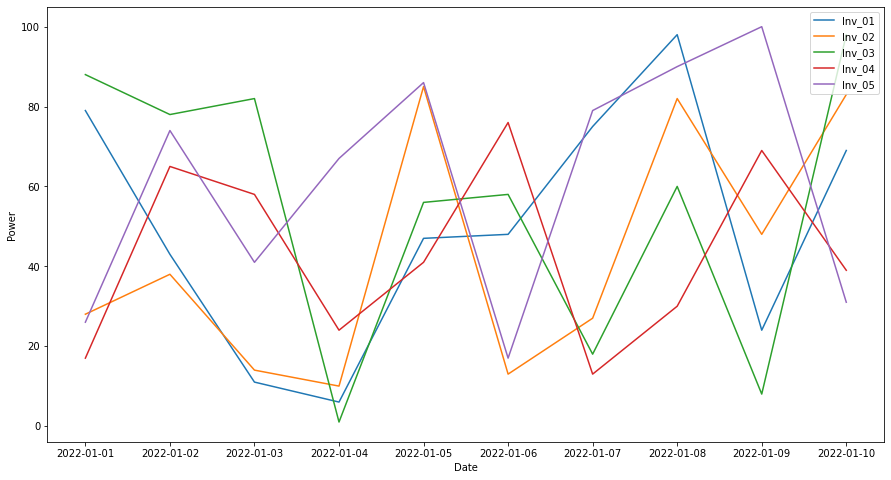

In [9]:
plt.figure(figsize=(15,8))
sns.lineplot(x = 'Date', y = 'Power', data = df, hue = "Inverter")
plt.legend(loc='upper right')